### LOAD and Pre-process

In [1]:
import numpy as np
images = np.load('./images.npy')
labels = np.load('./labels.npy')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
print(images.shape)
images.reshape(18000,150,150,1)
print(images.shape)

(18000, 150, 150)
(18000, 150, 150)


In [4]:
print(labels.shape)

(18000, 2)


In [5]:
train_data,test_data,train_label,test_label = train_test_split(images,labels,test_size=0.2, random_state=0)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [7]:
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()

<Figure size 640x480 with 1 Axes>

### Trian

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(150, 150,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_data.reshape(14400,150,150,1), train_label, batch_size=128, epochs=3)


[<tf.Tensor 'conv2d_1_input:0' shape=(?, 150, 150, 1) dtype=float32>]
Epoch 1/3
14400/14400 [==============================] - 356s 25ms/step - loss: 17196901069.0079 - accuracy: 0.8907
Epoch 2/3
14400/14400 [==============================] - 357s 25ms/step - loss: 534242814489.0311 - accuracy: 0.8907
Epoch 3/3
14400/14400 [==============================] - 371s 26ms/step - loss: 3227812553031.6797 - accuracy: 0.8907


In [11]:
model.save('my_model.h5')

In [13]:
score = model.evaluate(test_data.reshape(3600,150,150,1), test_label)
print('acc', score[1])

3600/3600 [==============================] - 24s 7ms/step
acc 0.8955555558204651


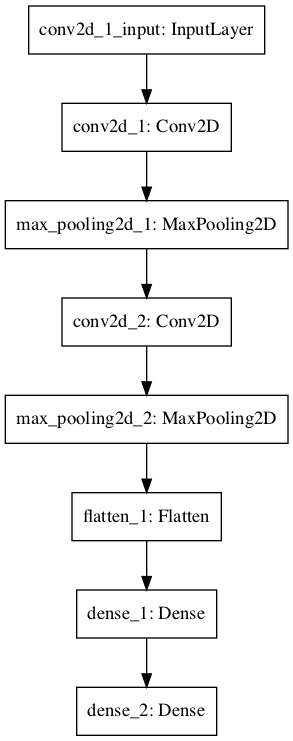

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')